**En basit haliyle bir sinir ağı inşa edelim**

Gerekli kütüphaneleri dahil edelim .
Eğer bunlara sahip değilseniz pip ile yükleyebilirsiniz

In [ ]:
import keras
import tensorflow as tf
import numpy as np

Tek katmanlı ,tek nöronlu bir sinir ağı tanımlayalım. Girdi olarak sayıları kullanacağımız için tek boyutlu bir girşimiz olacaktır (28x28 gibi bir görüntü ile çalışmıyoruz sonuçta :D)

In [ ]:
model = keras.Sequential([keras.layers.Dense(units = 1, input_shape = [1])]) #bu tek bir nöron

Optimizer olarak sgd(stokastik gradyan inişi),loss hesaplaması içinde mean_squared_error (hata karelerin ortalaması)'nı kullanacağız. Şimdilik buralara takılmamıza gerek fakat arkasında yatan matematiği kavramak bize modelimizi geliştirirken izlememiz gerekn yolu bulmamaıza yardımcı olacaktır.

In [ ]:
model.compile(optimizer= 'sgd' , loss= 'mean_squared_error')

Sıra hangi verilerimizle neyi çıkarmak istediğimize geldi.
x girdileri ile y çıktısını elde ettiğimiz bir problem olsun. Aşağıdaki verilere bakarak matematiksel olarak y = 2x -1 denklemini kolayca görebiliriz. Tabi ki biz bunu modelimizin anlamasını sağlamak istiyoruz.

Veri temsiliyetini daha kolay hale getirmek için numpy arraylerini kullandık.

In [ ]:
xs = np.array([-1.0, 0.0 ,1.0 ,2.0 ,3.0 ,4.0] ,dtype =float)
ys = np.array([-3.0 ,-1.0 ,1.0 ,3.0 ,5.0 ,7.0], dtype = float)

 fit() ile modelimizi eğitmeye başlayabiliriz. Bu fonksiyonun içine x ve y değerlerimizi ardındanda epochs sayımızı girelim. 
Epochs sayısı modelin kaç kere egitim dongüsüne gireceği belirler.

In [ ]:
model.fit(xs,ys,epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 1.1264
Epoch 2/500
1/1 [==============================] - 0s 1ms/step - loss: 1.0159
Epoch 3/500
1/1 [==============================] - 0s 1ms/step - loss: 0.9263
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 0.8533
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 0.7932
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 0.7435
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 0.7019
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 0.6668
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 0.6368
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 0.6109
Epoch 11/500
1/1 [==============================] - 0s 1ms/step - loss: 0.5882
Epoch 12/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5682
Epoch 13/500
1/1 [==============================] - 0s 2ms/st

Eğitim bitti ,modelimizin eğitim süresince daha iyi hale geldiğini loss(kayıp) değerinin gitgide azaldığını kontrol ederek görebiliriz. Model eğitim devam ederken her zaman daha iyi öğrenmeyebilir,bazen onu erken durdurmamız gerekebilir. Bazende çok düşük loss olmasına rağmen daha önce görmediği veriler üzerinde tahmin yaparken saçmalayabilir.

Lafı uzatmadan modelimize tahmin yaptırarak onu kendimiz test edelim

Örneğin x = 10 iken y nin değerinin ne olacağını tahmin etmesini sağlayalım.Tahmin için model.predict([x]) kullanacağız

In [ ]:
print(model.predict([10.0]))

[[18.986504]]


Cevabın tam olarak 19 olmasını bekledik fakat 19 a  çok yakın tam olarak 19 olmayan bir sayı gördük. Bunun iki ana nedeni cok az veri ile modelimizi egitmiş olmamız ve daha önemlisi sinir aglarının  olasiliklarlar ile çalışması yatıyor. Daha fazla veri ile 19 a daha yakın bir sayı elde edbilirdik basit bir örnek için buna ihtiyaç yoktur sanırım.

 Sinir ağının X ve Y arasındaki ilişki hakkında hiç bir fikri yoktur, bu yüzden bir tahmin yapar. Diyelim ki Y eşittir 10X eksi 10 şeklinde bir tahmin yapar. Daha sonra bildiği verileri kullanarak (bunlar daha önce gördüğümüz X ve Y'nin aldığı değerler kümesi) tahminin ne kadar iyi veya ne kadar kötü olduğunu ölçecek. Kayıp fonksiyonu bunu ölçer ve ardından bir sonraki tahmini yapacak olan optimize ediciye veriyi verir. Optimize edici kayıp fonksiyonundan gelen verileri kullanarak tahminin ne kadar iyi veya ne kadar kötü yapıldığını düşünür. O zaman buradaki mantık; her tahminin öncekinden daha iyi olması gerektiğidir. Yapılan tahminler iyileştikçe, doğruluk yüzde yüze yaklaşır, burada yakınsama terimi kullanılır.

Bu örneğimizde kayıp fonksiyonu ortalama kare hatası optimize ediciyse (optimizer) stokastik gradyan inişi anlamına gelen SGD'di

**Yeni bir örnek**

Örneğin bir ev fiyatlandırması hayal edelim. Evin fiyati 50bin ve her bir yeni oda için +50bin şeklinde bir fiyatlandırması olsun. 8 (ekstra 7 oda demek) odalı bir evin fiyatını bir yapay sinir ağ kurarak bulmaya çalışalım.

İpucu : Ağın daha iyi sonuçlar elde etmesi için sayılarımızı olabildiğince sade tutmaya çalışalım.Örneğin 50.000 yerine 50 kullanıp daha sonra 'bin' şeklinde bir ifadeyle düzeltebiliriz. 

**Ağımızın loss değerini anlık olarak takip etmek için livelossplot kütüphanesini kullanalım**

Yükleme ve import işlemlerini gerçekleştirelim

In [1]:
!pip install livelossplot

In [2]:
from livelossplot import PlotLossesKeras

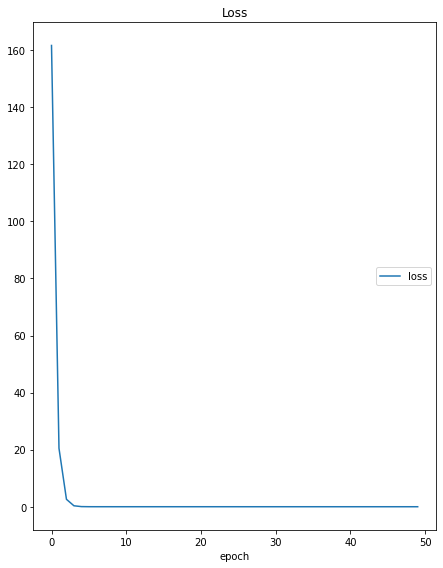

Loss
	loss             	 (min:    0.006, max:  161.637, cur:    0.006)
1/1 [==============================] - 0s 220ms/step - loss: 0.0063


In [5]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
xs = np.array([ 0,1, 2, 4, 6, 8, 10,])
ys = np.array([0.50, 1.00, 1.50, 2.50, 3.50, 4.50, 5.50])
model = keras.Sequential([keras.layers.Dense(units = 1, input_shape = [1])])
model.compile(optimizer= 'sgd' , loss= 'mean_squared_error')
model.fit(xs,ys,epochs = 50 , callbacks=[PlotLossesKeras()]) #callbacks eklelýoruz bize anlık geri donut vermesi için

Ekstra 7 odaya sahip bir evin fiyatı 50k+(7*50k) dan 400k çıkmasını bekleriz

In [9]:
print(100000*model.predict([7]))

[[399918.22242737]]


Tahminimizle tam olarak aynısının çıkmasını beklememeliyiz ,hedefimiz olabildiğince yakın bir değerdi. 